# <font color=red>Tutorial 7 - Hypotheses testing</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Monty cheating?

As we already saw, in the (3-door) Monty Hall Game, there's a 2/3 probability that a switch will result in a car. 

However, this probability holds only under the assumptions of the assumed model. One of these assumptions, for example, is that after the contestant chooses whether or not to switch his or her selection to the unopen door, nobody in the production side intervenes with whatever is behind the chosen door. 

Let's say you suspect Monty and the production company are cheating and that in fact the probability of winning the car after switching is lower than 2/3.

1. Clearly state the two hypotheses.

H0: The probability of winning the car after switching is 2/3 <br>
H1: The probability of winning the car after switching is lower than 2/3

You collect data on 84 shows in which a contestant decided to switch to the unopened door and write down what was behind the door to which the contestant switched in each such show. True records show that in 45 of the 84 shows, there was a car behind that door, and in the rest of the shows there was a goat.

2. What is your test statisic? Run a simulation and plot the empirical distribution of this statistic

[Text(0, 0.5, 'relative proportion in simulations (%)'),
 Text(0.5, 0, 'probability to win car')]

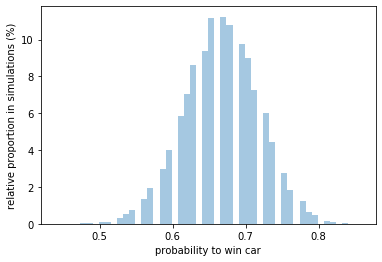

In [2]:
behind_door = ['car', 'goat'] # possible items behind door to which the contestant switches
prob_for_item = [2/3, 1/3] # probabilities GIVEN THE MODEL IS TRUE
sample_size = 84 # number of shows sampled
number_of_wins_from_real_data = 45 # Number of wins observed in 84 shows

# simulate one value
def prob_win_car():
    sample_shows = np.random.choice(behind_door, p=prob_for_item, size=sample_size)
    num_cars = np.count_nonzero(sample_shows == 'car')
    return num_cars/sample_size

# run multiple simulations
num_repetitions = 20000
many_prob_win_car = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    many_prob_win_car[i] = prob_win_car()

# plot the empirical distribution of the statistic
ax = sns.distplot(many_prob_win_car, kde=False, norm_hist=True)
ax.set(xlabel='probability to win car', ylabel='relative proportion in simulations (%)')

3. Replot the the figure above, this time marking also the test statitsic

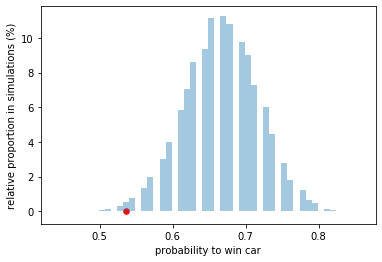

In [3]:
prob_win_in_data = number_of_wins_from_real_data/sample_size

# plot the empirical distribution of the statistic
ax = sns.distplot(many_prob_win_car, kde=False, norm_hist=True)
ax.set(xlabel='probability to win car', ylabel='relative proportion in simulations (%)')
# Add a red point on the plot marking our data
plt.scatter(prob_win_in_data, 0, marker='o', s=30, color='red')  # draw observed value

4. What is the *p*-value of your test?

In [4]:
num_simulations_like_data_or_more_extreme = np.count_nonzero(many_prob_win_car <= prob_win_in_data) 
print ('The p-value is', num_simulations_like_data_or_more_extreme/num_repetitions)

The p-value is 0.0092


5. What is your conclusion?

We got p<0.05, which means that the result in our data (the red point: 45/84) is part of the 5% tail of the empirical distribution. Therefore, assuming significance level of 0.05, we will reject the null hypothesis. That is, we can reject the hypothesis that the probability of winning the car after a switch is 2/3. It may be true that Monty is cheating according the results we got (but it can happen from other reasons too).  

## <font color=blue> **Exercise** </font>
## Contestants biased?

Let's now say that after watching many shows to collect your data, you start to notice that on average, on their first pick, contestants do not seem to choose randomly between the three doors (they seem to choose the middle door less). Specifically, in the 84 shows you recorded, contestants chose the left door (door A) 32 times, the middle door (door B) 22 times, and the left door (door C) 30 times. So you have decided to investigate if it is indeed a random pick based on the second door. 

1. Clearly state the two hypotheses

H0: The paticipants choose the first door randomlly.
H1: The paticipants don't choose the first door randomlly.

2. What is your test statistic? 


How manyu times the participants chose the middle door.

3. Run a simulation and plot the empirical distribution of this statistic, and mark the outcome of the statistic in your data on the plot

[Text(0, 0.5, 'relative proportion in simulations (%)'),
 Text(0.5, 0, 'middle door portion')]

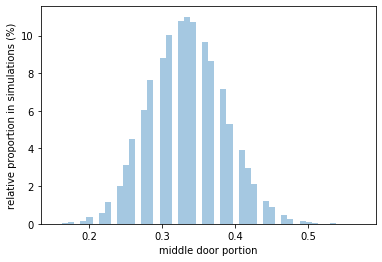

In [12]:
# write your code here
doors = ['A', 'B', 'C']
prob_for_doors = [1/3, 1/3, 1/3] # probabilities GIVEN THE MODEL IS TRUE
sample_size = 84 # number of shows sampled
number_of_middle_doors_picks_from_real_data = 22 # Number of wins observed in 84 shows
prob_win_in_data = number_of_middle_doors_picks_from_real_data / sample_size

# simulate one value
def middle_door_portion():
    sample_shows = np.random.choice(doors, p=prob_for_doors, size=sample_size)
    middle_door_counter = np.count_nonzero(sample_shows == 'B')
    return middle_door_counter / sample_size

# run multiple simulations
num_repetitions = 20000
many_middle_door_portion = np.empty(num_repetitions) # collection array
for i in range(num_repetitions):
    many_middle_door_portion[i] = middle_door_portion()

# plot the empirical distribution of the statistic
ax = sns.distplot(many_middle_door_portion, kde=False, norm_hist=True)
ax.set(xlabel='middle door portion', ylabel='relative proportion in simulations (%)')

4. What is the *p*-value? 

In [13]:
# write your code here
num_simulations_like_data_or_more_extreme = np.count_nonzero(many_middle_door_portion <= prob_win_in_data) 
print ('The p-value is', num_simulations_like_data_or_more_extreme/num_repetitions)

The p-value is 0.10095


5. What is your conclusion?

My conclusion is that the paricipants choose the door randomlly, because the probability (0.1) is bigger then 0.05, so we can't reject the null hypothesis.